## Walker star patterns

We follow Walker "Circular orbit patterns providing continuous whole Earth coverage", 1970.

First, we derive again the equations as done in Appendix B:

In [2]:
from sympy import cos, sin, tan, csc, cot, acos, atan, pi
from sympy import init_printing, symbols, Eq, solve
from sympy.core.expr import UnevaluatedExpr
from sympy.printing.numpy import NumPyPrinter

init_printing()

In [3]:
PB, RP, AR, BR, BRP, ARP, BM, PM, POpM, OpM = symbols("PB, RP, AR, BR, BRP, ARP, BM, PM, POpM, OpM", real=True)
a, b, α, β, γ = symbols("a, b, α, β, γ", real=True)
n_, p_ = symbols("n, p", natural=True)

In [4]:
eq_b1 = Eq(cos(PB), cos(BR) * cos(RP) + sin(BR) * sin(RP) * cos(BRP))
eq_b1

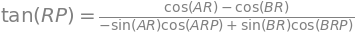

In [5]:
eq_b2 = Eq(tan(RP), (cos(AR) - cos(BR)) / (sin(BR) * cos(BRP) - sin(AR) * cos(ARP)))
eq_b2

General case:

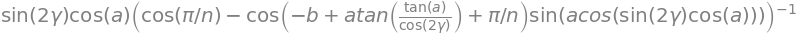

In [6]:
tan_RP = eq_b2.subs({
    BR: pi / 2,
    ARP: UnevaluatedExpr(atan(tan(a) / cos(2 * γ)) + pi / n_ - b),
    cos(AR): cos(a) * cos(pi / 2 - 2 * γ),
    sin(AR): sin(UnevaluatedExpr(acos(cos(a) * cos(pi / 2 - 2 * γ)))),
    BRP: pi / n_
}).rhs
tan_RP

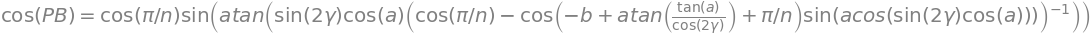

In [7]:
eq_d = eq_b1.subs({
    BR: pi / 2,
    ARP: UnevaluatedExpr(atan(tan(a) / cos(2 * γ)) + pi / n_ - b),
    cos(AR): cos(a) * cos(pi / 2 - 2 * γ),
    sin(AR): sin(UnevaluatedExpr(acos(cos(a) * cos(pi / 2 - 2 * γ)))),
    BRP: pi / n_,
    RP: UnevaluatedExpr(atan(tan_RP)),
})
eq_d

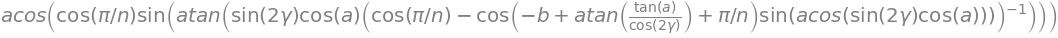

In [8]:
d = acos(eq_d.rhs)
d

In [9]:
print(NumPyPrinter().doprint(d).replace("numpy.", "np."))

np.arccos(np.cos(np.pi/n)*np.sin(np.arctan(np.sin(2*γ)*np.cos(a)*(np.cos(np.pi/n) - np.cos(-b + np.arctan(np.tan(a)/np.cos(2*γ)) + np.pi/n)*np.sin(np.arccos(np.sin(2*γ)*np.cos(a))))**(-1.0))))


---

At the passing points, case $a = b$ (Appendix B, equation B-4):

In [10]:
d_b4 = acos(
    cos(BM) * cos(PM)
).subs({
    PM: UnevaluatedExpr(atan(tan(POpM) * sin(OpM))),
}).subs({
    BM: pi / n_,
    POpM: γ,
    OpM: pi / 2 - (pi / n_ - b),
})
d_b4

For $p + n$ even (equation 3):

In [11]:
d_max_eq3 = d_b4.subs({
    a: pi / (2 * n_),
    b: pi / (2 * n_),
    γ: β
})
d_max_eq3

In [12]:
print(NumPyPrinter().doprint(d_max_eq3).replace("numpy.", "np."))

np.arccos(np.cos(np.pi/n)*np.cos(np.arctan(np.cos((1/2)*np.pi/n)*np.tan(β))))


For $p + n$ odd (equation 4):

In [13]:
d_max_eq4 = d_b4.subs({
    a: pi / n_,
    b: pi / n_,
    γ: β
}).subs(atan(tan(β)), β)
d_max_eq4

In [14]:
print(NumPyPrinter().doprint(d_max_eq4).replace("numpy.", "np."))

np.arccos(np.cos(np.pi/n)*np.cos(β))


Inclination $\alpha$ at which the minimum value of $d_{max}$ is obtained, for $n + p$ even:

In [15]:
alpha_eq3 = Eq(
    cos(pi / n_) * csc(2 * α) - cot(2 * α),
    cos(pi / (2 * n_)) * cot((p_ - 1) * α)
)
alpha_eq3

Same thing, for $n + p$ odd:

In [16]:
alpha_eq4 = Eq(
    cos(pi / n_) * csc(2 * α) - cot(2 * α),
    cot((p_ - 1) * α)
)
alpha_eq4

Some particular cases are derived in the paper ($p = 2$, $p = 3$) for both $p + n$ even and odd. With some tedious algebraic manipulations that are not reproduced in the paper, solutions might be obtained for larger values of $p$. A general solution is not described.

As an alternative, a numerical solution can be found:

In [17]:
from sympy import nsolve

In [18]:
nsolve(
    (alpha_eq4.rhs - alpha_eq4.lhs).subs({p_: 2, n_: 3}),
    α,
    cos(pi / 3) / 2,
)

In [19]:
(acos((cos(pi / 3) - 1) / 2) / 2).evalf()  # Same solution

In [20]:
nsolve(
    (alpha_eq3.rhs - alpha_eq3.lhs).subs({p_: 2, n_: 2}),
    α,
    cos(pi / 3) / 2,
)

In [21]:
(acos((cos(pi / 2) - cos(pi / 4)) / (1 + cos(pi / 4))) / 2).evalf()  # Same solution

We now code these solutions to reproduce the paper results:

In [22]:
import numpy as np

In [23]:
def walker_star(n, p):
    """Walker star constellation.

    Parameters
    ----------
    n : int
        Number of satellites per plane.
    p : int
        Total number of planes.

    """
    if (p % 2 == 0 and n % 2 == 0) or (p % 2 == 1 and n % 2 == 1):
        a = b = np.pi / (2 * n)
        # Solve for α from appropriate equation
        if p == 2:
            alpha = np.arccos(
                (np.cos(np.pi / n) - np.cos(np.pi / (2 * n))) / (1 + np.cos(np.pi / (2 * n)))
            ) / 2
        elif p == 3:
            alpha = np.arccos(
                np.cos(np.pi / n) / (1 + np.cos(np.pi / (2 * n)))
            ) / 2
        else:
            alpha = float(nsolve(
                (alpha_eq3.rhs - alpha_eq3.lhs).subs({p_: p, n_: n}),
                α,
                cos(pi / 3) / 2,
            ))
        # Solve for β from equation 1
        beta = np.pi / 2 - (p - 1) * alpha
        # Compute d_max using equation 3
        d_max = np.arccos(
            np.cos(np.pi / n) * np.cos(np.arctan(np.cos(np.pi / (2 * n)) * np.tan(beta)))
        )
    else:
        a = b = pi / n
        # Solve for α from appropriate equation
        if p == 2:
            alpha = np.arccos(
                (np.cos(np.pi / n) - 1) / 2
            ) / 2
        elif p == 3:
            alpha = np.arccos(
                np.cos(np.pi / n) / 2
            ) / 2
        else:
            alpha = float(nsolve(
                (alpha_eq4.rhs - alpha_eq4.lhs).subs({p_: p, n_: n}),
                α,
                cos(pi / 3) / 2,
            ))
        # Solve for β from equation 1
        beta = np.pi / 2 - (p - 1) * alpha
        # Compute d_max using equation 4
        d_max = np.arccos(np.cos(np.pi / n) * np.cos(beta))

    return d_max, alpha, beta

Results from Table 1:

In [24]:
import ipytest
ipytest.autoconfig()

In [25]:
%%run_pytest[clean]
import pytest

# Table 1
@pytest.mark.parametrize("p,n,expected_d_max,expected_α,expected_β", [
    (2, 3, 66.7, 52.2, 37.8),
    (2, 4, 57.0, 48.4, 41.6),
    (2, 5, 53.2, 47.7, 42.3),
    (3, 4, 48.6, 34.7, 20.7),
    (3, 5, 42.1, 32.8, 24.5),
    (3, 6, 38.7, 32.2, 25.7),
    (3, 7, 36.3, 31.4, 27.2),
    (4, 6, 33.5, 24.7, 16.0),
])
def test_walker_star(p, n, expected_d_max, expected_α, expected_β):
    d_max, α, β = walker_star(n, p)

    assert np.degrees(d_max) == pytest.approx(expected_d_max, abs=1e-1)
    assert np.degrees(α) == pytest.approx(expected_α, abs=1e-0)
    assert np.degrees(β) == pytest.approx(expected_β, abs=1e-0)

........                                                                                                                                                                                                                               [100%]
8 passed in 0.03s


And we reproduce Figure 9:

In [26]:
import matplotlib.pyplot as plt

from scipy.interpolate import InterpolatedUnivariateSpline

<ipython-input-27-2b4fd343a204>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d_max_arr = np.zeros((len(p_arr), len(n_arr)), dtype=np.float)


Text(0.5, 0, 'Number of satellites in system $np$')

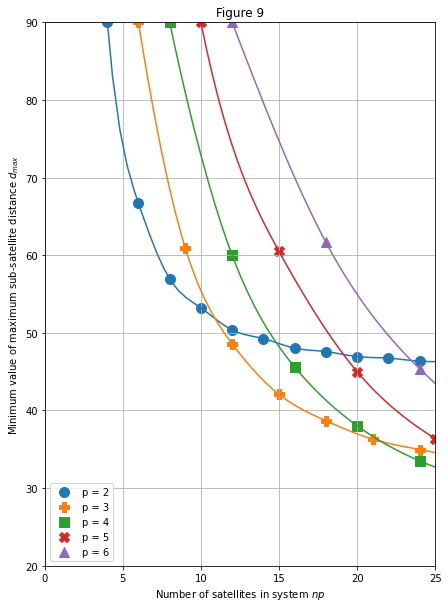

In [27]:
p_arr = np.arange(2, 7)
n_arr = np.arange(1, 20)
d_max_arr = np.zeros((len(p_arr), len(n_arr)), dtype=float)
for ii in range(len(p_arr)):
    for jj in range(len(n_arr)):
        d_max_arr[ii, jj], *_ = walker_star(n_arr[jj], p_arr[ii])

fig, ax = plt.subplots(figsize=(7, 10))

markers = {1: "*", 2: "o", 3: "P", 4: "s", 5: "X", 6: "^"}
for ii in range(len(p_arr)):
    ax.scatter(
        n_arr * p_arr[ii],
        np.degrees(d_max_arr[ii]),
        label=f"p = {p_arr[ii]}",
        marker=markers[p_arr[ii]],
        s=100,
    )

    # Spline for visualization
    x_ = np.linspace((n_arr * p_arr[ii]).min(), 25)
    spline_ = InterpolatedUnivariateSpline(n_arr * p_arr[ii], np.degrees(d_max_arr[ii]))
    ax.plot(x_, spline_(x_))

ax.set_xlim(0, 25)
ax.set_ylim(20, 90)
ax.grid()
ax.legend(loc=3)
ax.set_title("Figure 9")
ax.set_ylabel("Minimum value of maximum sub-satellite distance $d_{max}$")
ax.set_xlabel("Number of satellites in system $np$")

And finally, we create a function to produce the relevant orbital elements of the constellation:

In [28]:
from collections import namedtuple

Plane = namedtuple("Plane", ["p", "inclination", "raan"])
Satellite = namedtuple("Satellite", ["plane", "n", "arglat"])

In [29]:
def walker_star_constellation(n, p):
    _, alpha, beta = walker_star(n, p)
    for ii in range(p):
        plane = Plane(ii, np.pi / 2, beta + 2 * ii * alpha)
        for jj in range(n):
            yield Satellite(plane, jj, jj * 2 * np.pi / n)

In [30]:
list(walker_star_constellation(5, 4))

[Satellite(plane=Plane(p=0, inclination=1.5707963267948966, raan=0.23007887092788004), n=0, arglat=0.0),
 Satellite(plane=Plane(p=0, inclination=1.5707963267948966, raan=0.23007887092788004), n=1, arglat=1.2566370614359172),
 Satellite(plane=Plane(p=0, inclination=1.5707963267948966, raan=0.23007887092788004), n=2, arglat=2.5132741228718345),
 Satellite(plane=Plane(p=0, inclination=1.5707963267948966, raan=0.23007887092788004), n=3, arglat=3.7699111843077517),
 Satellite(plane=Plane(p=0, inclination=1.5707963267948966, raan=0.23007887092788004), n=4, arglat=5.026548245743669),
 Satellite(plane=Plane(p=1, inclination=1.5707963267948966, raan=1.1238905081725576), n=0, arglat=0.0),
 Satellite(plane=Plane(p=1, inclination=1.5707963267948966, raan=1.1238905081725576), n=1, arglat=1.2566370614359172),
 Satellite(plane=Plane(p=1, inclination=1.5707963267948966, raan=1.1238905081725576), n=2, arglat=2.5132741228718345),
 Satellite(plane=Plane(p=1, inclination=1.5707963267948966, raan=1.1238905